# Solving a simple Problem with Neural Network

In [3]:
##importing the main deep learning 
import tensorflow as tf
from tensorflow import keras

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", keras.__version__)


Tensorflow Version:  2.3.0
Keras Version:  2.4.0


In [4]:
import numpy as np
import pandas as pd

In [5]:
bedrooms = np.array([2,3,4,5,6,7])
house_prices = np.array([150, 200, 250, 300, 350, 400])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(bedrooms, house_prices, epochs=100)

print(model.predict([10]))


Epoch 1/100
1/1 [==============================] - 0s 886us/step - loss: 79468.8203
Epoch 2/100
1/1 [==============================] - 0s 654us/step - loss: 21552.4062
Epoch 3/100
1/1 [==============================] - 0s 583us/step - loss: 5945.7378
Epoch 4/100
1/1 [==============================] - 0s 607us/step - loss: 1739.7407
Epoch 5/100
1/1 [==============================] - 0s 440us/step - loss: 605.7371
Epoch 6/100
1/1 [==============================] - 0s 622us/step - loss: 299.5081
Epoch 7/100
1/1 [==============================] - 0s 563us/step - loss: 216.3319
Epoch 8/100
1/1 [==============================] - 0s 479us/step - loss: 193.2623
Epoch 9/100
1/1 [==============================] - 0s 523us/step - loss: 186.3917
Epoch 10/100
1/1 [==============================] - 0s 517us/step - loss: 183.8896
Epoch 11/100
1/1 [==============================] - 0s 977us/step - loss: 182.5675
Epoch 12/100
1/1 [==============================] - 0s 537us/step - loss: 181.5668
Epoch 1

1/1 [==============================] - 0s 486us/step - loss: 118.9563
Epoch 100/100
1/1 [==============================] - 0s 405us/step - loss: 118.3797
[[579.13885]]



# Image Classification on Fashion MNIST dataset


In [6]:
##loading fashion MNIST dataset from tensorflow data API
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
y_train[1]

0

## Creating a validation set from the training set

* Reserving first 5000 rows images for validation set.
* Since we'll be training the neural network using gradient descent, we must scale the input features, i.e. we'll scale the intensities down to 0-1 range by dividing them by 255.0

In [11]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.0

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[1]]

'T-shirt/top'

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

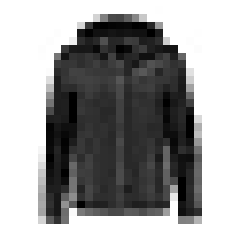

In [15]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

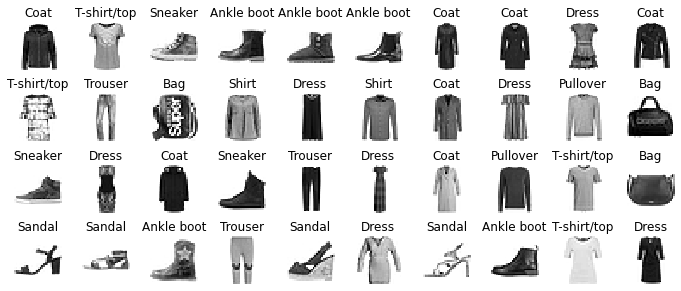

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Defining Model with 2 Hidden Layer using Sequential API

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # input flatten layer
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # output layer
])


In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
hidden_1 = model.layers[1]

In [21]:
hidden_1.name

'dense_1'

In [22]:
## learning weights and biases
weights, biases = hidden_1.get_weights()

In [23]:
weights

array([[-0.05183061, -0.04566119, -0.01383061, ..., -0.05587399,
         0.01746386, -0.03832611],
       [-0.01173294,  0.06491143,  0.02289272, ..., -0.04418156,
         0.0124047 , -0.03576134],
       [-0.00932575, -0.01052573, -0.02313573, ...,  0.05027711,
         0.02443904, -0.01353106],
       ...,
       [-0.02417123, -0.03549542, -0.00944456, ..., -0.07224724,
        -0.03943105, -0.07201757],
       [-0.03263025,  0.05174993, -0.02754827, ...,  0.0454105 ,
        -0.03562031, -0.04650144],
       [ 0.04036341, -0.05412877,  0.01847737, ...,  0.00089495,
         0.06719334,  0.03687744]], dtype=float32)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compiling the model

1. **Loss**: we use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive.
2. **Optimizer**: "sgd" means that we will train the model using simple Stochastic Gradient Descent. Bsically, Keras will perform the backpropagation algorithm as discussed.
3. **Metrics**: Since this is a classification problem, it'd be useful to measure the accuracy of the model.

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
 history = model.fit(X_train, y_train, epochs=30, 
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7077 - accuracy: 0.7662 - val_loss: 0.5092 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 2s 990us/step - loss: 0.4835 - accuracy: 0.8311 - val_loss: 0.4517 - val_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 2s 980us/step - loss: 0.4395 - accuracy: 0.8452 - val_loss: 0.4471 - val_accuracy: 0.8408
Epoch 4/30
1719/1719 [==============================] - 2s 994us/step - loss: 0.4133 - accuracy: 0.8545 - val_loss: 0.4013 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 2s 986us/step - loss: 0.3940 - accuracy: 0.8610 - val_loss: 0.3788 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3781 - accuracy: 0.8665 - val_loss: 0.3850 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 2s 996us/step - loss: 0.3667 - accuracy: 0.8696 - val_loss: 0.3684 - val

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 533us/step - loss: 0.3326 - accuracy: 0.8823


[0.3326309025287628, 0.8823000192642212]

In [30]:
history = pd.DataFrame(history.history)


AttributeError: 'DataFrame' object has no attribute 'history'

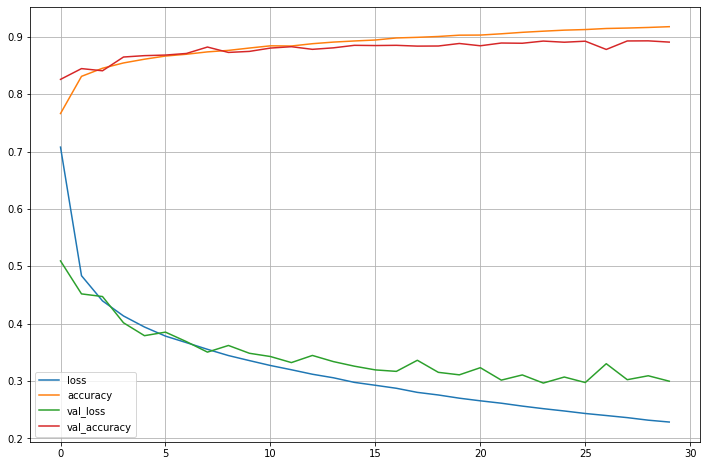

In [33]:
history.plot(figsize = (12,8))

plt.grid(True)

## Making a few predictions
Running it on a sample of data

In [34]:
X_sample = X_test[:5]
y_proba = model.predict(X_sample)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.01, 0.  , 0.9 , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = model.predict_classes(X_sample)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1, 6])

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [37]:
y_sample = y_test[:5]
np.array(class_names)[y_sample]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')